<a href="https://colab.research.google.com/github/urtbest86/MLOps/blob/master/sklearn(softmax)ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [118]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [119]:
from google.colab import files
import io
data = files.upload()

Saving result.csv to result (4).csv


In [120]:
df = pd.read_csv('result.csv')

In [121]:
train=df.sample(frac=0.8)
test=df.sample(frac=0.2)

In [122]:
mean = train.mean(axis=0)
train -= mean
std = train.std(axis=0)
train /= std

test -= mean
test /= std

In [123]:
train_data_set = train.values
x_train = train_data_set[:, 2:-1].astype(float)
y_train = train_data_set[:, -1].astype(float)

In [124]:
test_data_set = test.values
x_test = test_data_set[:, 2:-1].astype(float)
y_test = test_data_set[:, -1].astype(float)

In [125]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

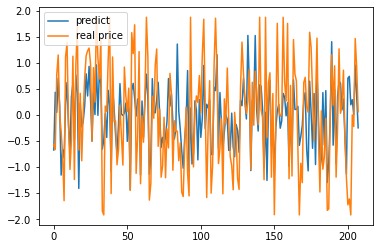

In [126]:
import matplotlib.pyplot as plt

plt.plot(mlr.predict(x_test), label="predict")
y_t=y_test.reshape(-1,1)
plt.plot(y_test, label="real price")
plt.legend()

In [127]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(1024, input_dim = 11, activation='softmax'))
model.add(Dense(500,activation='softmax'))
model.add(Dense(300,activation='softmax'))
model.add(Dense(200,activation='softmax'))
model.add(Dense(1))

In [128]:
model.compile(loss='mse', optimizer='adam',metrics=['mae'])

In [129]:
hist=model.fit(x_train, y_train, epochs=200, batch_size=32)

Epoch 1/200
26/26 [==============================] - 1s 13ms/step - loss: 0.9991 - mae: 0.8237
Epoch 2/200
26/26 [==============================] - 0s 11ms/step - loss: 0.9989 - mae: 0.8236
Epoch 3/200
26/26 [==============================] - 0s 12ms/step - loss: 0.9989 - mae: 0.8236
Epoch 4/200
26/26 [==============================] - 0s 13ms/step - loss: 0.9993 - mae: 0.8240
Epoch 5/200
26/26 [==============================] - 0s 13ms/step - loss: 0.9988 - mae: 0.8236
Epoch 6/200
26/26 [==============================] - 0s 12ms/step - loss: 0.9990 - mae: 0.8236
Epoch 7/200
26/26 [==============================] - 0s 12ms/step - loss: 0.9989 - mae: 0.8234
Epoch 8/200
26/26 [==============================] - 0s 12ms/step - loss: 0.9989 - mae: 0.8234
Epoch 9/200
26/26 [==============================] - 0s 12ms/step - loss: 0.9992 - mae: 0.8236
Epoch 10/200
26/26 [==============================] - 0s 11ms/step - loss: 0.9988 - mae: 0.8233
Epoch 11/200
26/26 [=============================

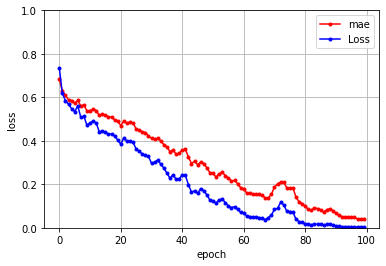

In [113]:
y_acc = hist.history['mae']
y_loss = hist.history['loss']#x_len = np.arange(len(y_loss)) 
x_len = np.arange(100)
plt.plot(x_len, y_acc[:100], marker='.', c='red', label="mae")
plt.plot(x_len, y_loss[:100], marker='.', c='blue', label="Loss")

plt.legend(loc='upper right')
plt.grid()
plt.ylim(0,1)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()


In [114]:
print('## training loss and acc ##')
print(hist.history['loss'])
print(hist.history['mae'])

## training loss and acc ##
[0.7355432510375977, 0.6177229285240173, 0.5850459933280945, 0.5678480863571167, 0.5480039119720459, 0.5339186191558838, 0.5607123970985413, 0.5079850554466248, 0.5125352740287781, 0.47188305854797363, 0.48262202739715576, 0.4909457564353943, 0.4826240539550781, 0.4412069618701935, 0.445046603679657, 0.44039100408554077, 0.43009933829307556, 0.4309123158454895, 0.4227716326713562, 0.4034501016139984, 0.3846225142478943, 0.41419726610183716, 0.3980776369571686, 0.3987314701080322, 0.3931225836277008, 0.3623896539211273, 0.35190749168395996, 0.3406153917312622, 0.3334196209907532, 0.32841283082962036, 0.29686474800109863, 0.3021089434623718, 0.3110587000846863, 0.29319998621940613, 0.27447938919067383, 0.2519313097000122, 0.2280956208705902, 0.24369287490844727, 0.2231537252664566, 0.225773423910141, 0.2421046942472458, 0.24137437343597412, 0.19852539896965027, 0.1639389991760254, 0.17005108296871185, 0.1580304056406021, 0.1805175244808197, 0.1710635870695114,

In [115]:
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and_metrics ##')
print(loss_and_metrics)

7/7 [==============================] - 0s 4ms/step - loss: 0.1611 - mae: 0.2137
## evaluation loss and_metrics ##
[0.1610787957906723, 0.2136986255645752]


In [116]:
xhat = x_test[0:1]
yhat = model.predict(xhat)
print('## yhat ##')
print(yhat)
print(y_test[0:1])

## yhat ##
[[-1.1700555]]
[-1.25058774]


In [117]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1024)              12288     
_________________________________________________________________
dense_21 (Dense)             (None, 500)               512500    
_________________________________________________________________
dense_22 (Dense)             (None, 300)               150300    
_________________________________________________________________
dense_23 (Dense)             (None, 200)               60200     
_________________________________________________________________
dense_24 (Dense)             (None, 1)                 201       
Total params: 735,489
Trainable params: 735,489
Non-trainable params: 0
_________________________________________________________________


In [56]:
d